Logistic Regression

In [ ]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, bernoulli
from scipy.special import expit as logistic_sigmoid
import statsmodels.api as sm


In [4]:
# Load Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Drop missing values for relevant columns
df = df.dropna(subset=['Survived', 'Age', 'Sex', 'Pclass'])

# Create binary variables
df['Sex_Male'] = (df['Sex'] == 'male').astype(int)

# Define outcome and predictors
Y = df['Survived']
X = df[['Age', 'Sex_Male', 'Pclass']]
X_with_intercept = sm.add_constant(X)


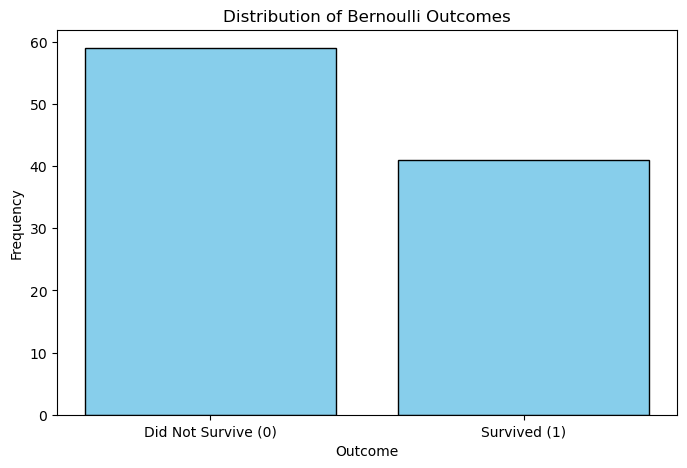

Estimated survival probability (pi): 0.41


In [5]:
# Simulate a sample of n = 100 Bernoulli distributed outcomes
n = 100  # sample size
pi = Y.mean()  # Estimate survival probability
bernoulli_sample = np.random.binomial(1, pi, size=n)

# Plot the distribution of Bernoulli outcomes
plt.figure(figsize=(8, 5))
plt.hist(bernoulli_sample, bins=[-0.5, 0.5, 1.5], edgecolor='black', color='skyblue', rwidth=0.8)
plt.xticks([0, 1], ['Did Not Survive (0)', 'Survived (1)'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Bernoulli Outcomes')
plt.show()

# Estimate the value of pi
pi_estimate = np.mean(bernoulli_sample)
print(f"Estimated survival probability (pi): {pi_estimate}")


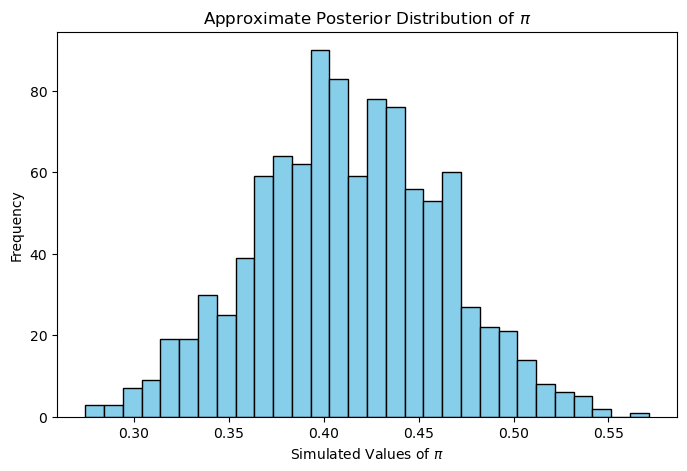

In [6]:
# Approximate posterior distribution for pi
alpha_posterior = 1 + np.sum(bernoulli_sample)  # successes + 1
beta_posterior = 1 + (n - np.sum(bernoulli_sample))  # failures + 1

pi_posterior_samples = beta.rvs(alpha_posterior, beta_posterior, size=1000)

# Plot the posterior distribution
plt.figure(figsize=(8, 5))
plt.hist(pi_posterior_samples, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Simulated Values of $\pi$')
plt.ylabel('Frequency')
plt.title('Approximate Posterior Distribution of $\pi$')
plt.show()


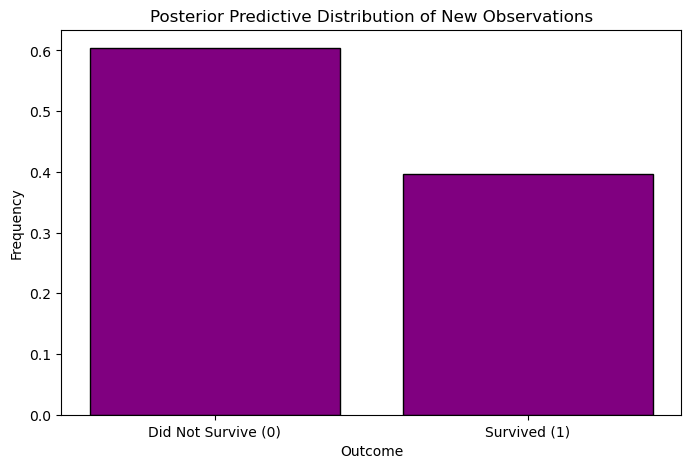

In [7]:
# Generate posterior predictive distribution
post_pred_sims = [bernoulli.rvs(pi) for pi in pi_posterior_samples]

# Plot the posterior predictive distribution
plt.figure(figsize=(8, 5))
plt.hist(post_pred_sims, bins=[-0.5, 0.5, 1.5], color='purple', edgecolor='black', rwidth=0.8, density=True)
plt.xticks([0, 1], ['Did Not Survive (0)', 'Survived (1)'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Distribution of New Observations')
plt.show()


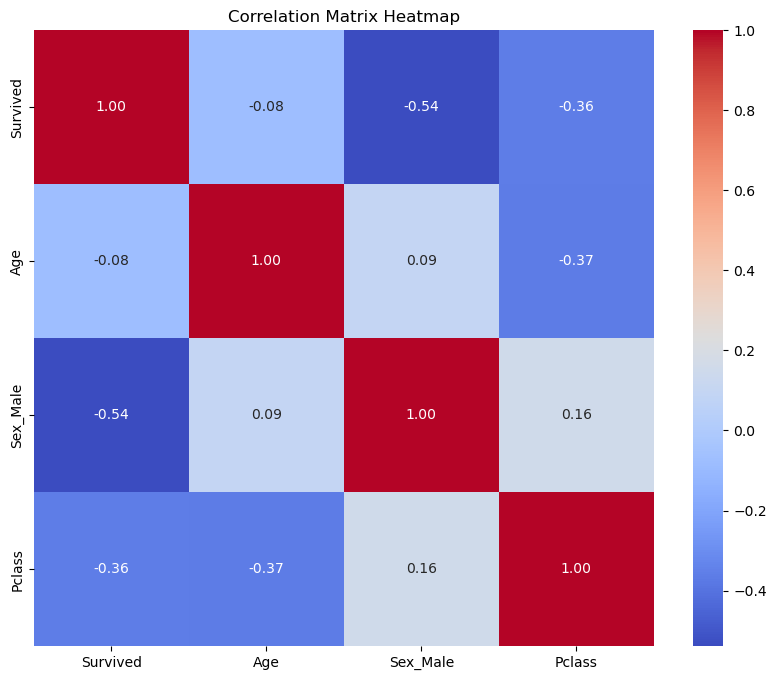

In [8]:
# Combine outcome and predictors
YX = pd.concat([Y, X], axis=1)

# Calculate correlation matrix
correlation_matrix = YX.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [9]:
# Fit logistic regression model
model = sm.Logit(Y, X_with_intercept)
result = model.fit()

# Print model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.453285
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.3289
Time:                        23:38:46   Log-Likelihood:                -323.65
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.860e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0560      0.502     10.069      0.000       4.072       6.040
Age           -0.0369      0.

Summary Statistics and Probability of Coefficient > 0:
               Mean       STD  Prob > 0
Intercept  5.071993  0.501000       1.0
Age       -0.037213  0.007515       0.0
Sex_Male  -2.515423  0.206227       0.0
Pclass    -1.296650  0.140497       0.0


/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

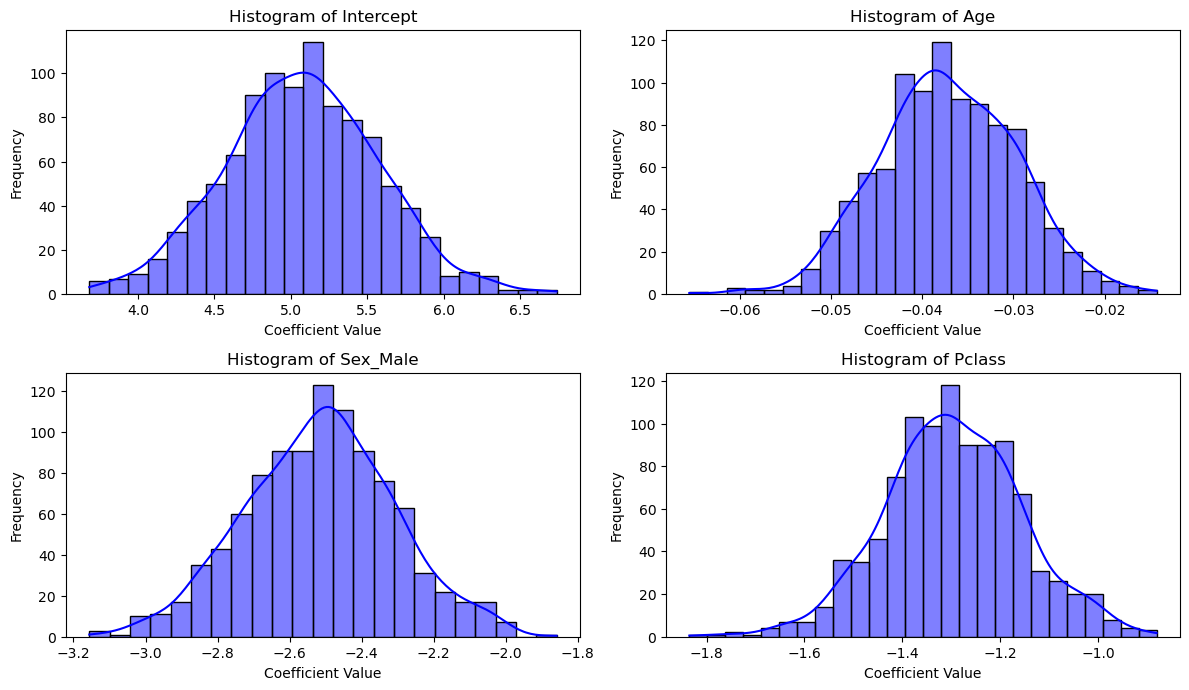

In [10]:
# Simulate coefficients from posterior
beta_mean = result.params
beta_cov = result.cov_params()
n_simulations = 1000
simulated_betas = np.random.multivariate_normal(beta_mean, beta_cov, n_simulations)

# Summary statistics and histograms for coefficients
mean_betas = np.mean(simulated_betas, axis=0)
std_betas = np.std(simulated_betas, axis=0)
prob_positive = np.mean(simulated_betas > 0, axis=0)

summary_stats = pd.DataFrame({
    'Mean': mean_betas,
    'STD': std_betas,
    'Prob > 0': prob_positive
}, index=['Intercept', 'Age', 'Sex_Male', 'Pclass'])

print("Summary Statistics and Probability of Coefficient > 0:")
print(summary_stats)

# Plot histograms for coefficients
plt.figure(figsize=(12, 10))
for i, column in enumerate(summary_stats.index):
    plt.subplot(3, 2, i + 1)
    sns.histplot(simulated_betas[:, i], kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


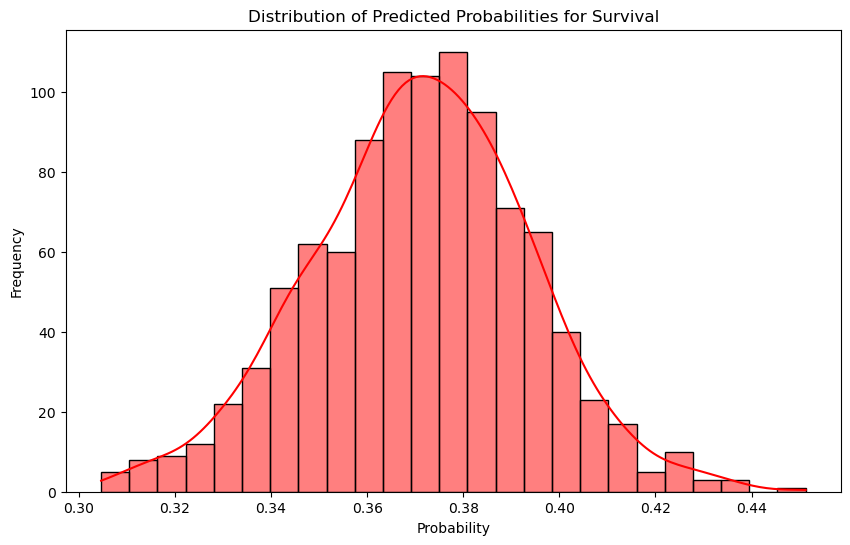

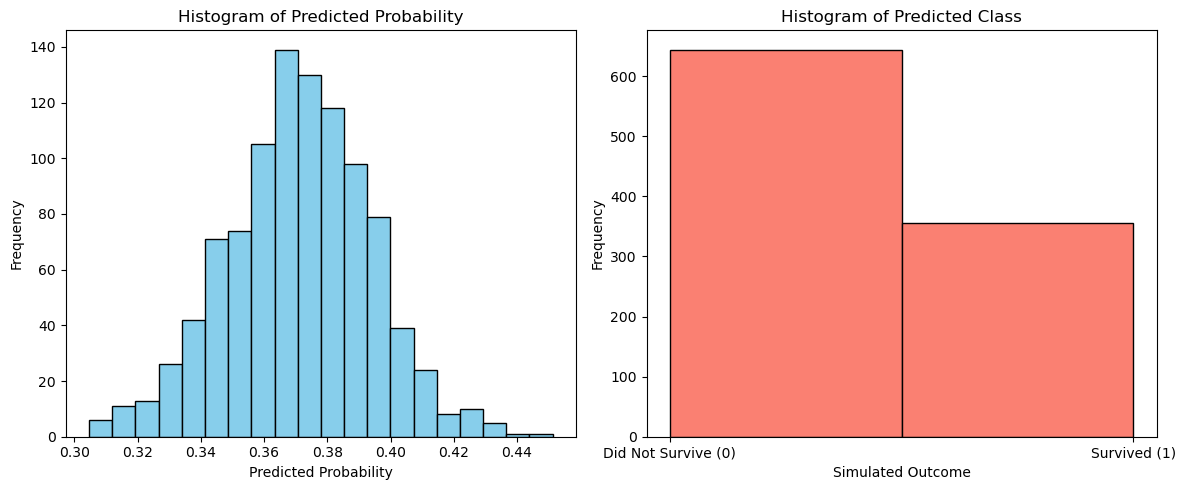

In [11]:
# Predict survival probability for an average passenger
average_X = X_with_intercept.mean(axis=0)
new_predicted_probs = logistic_sigmoid(np.dot(simulated_betas, average_X.values))

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(new_predicted_probs, kde=True, color='red')
plt.title('Distribution of Predicted Probabilities for Survival')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

# Simulate outcomes for the average passenger
new_simulated_outcomes = np.random.binomial(1, new_predicted_probs, size=1000)

# Plot predicted probabilities and simulated outcomes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(new_predicted_probs, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Predicted Probability')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')

axes[1].hist(new_simulated_outcomes, bins=2, color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Predicted Class')
axes[1].set_xlabel('Simulated Outcome')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Did Not Survive (0)', 'Survived (1)'])

plt.tight_layout()
plt.show()
